# Heart Failure Prediction Portfolio - Notebook 1 of 2

<img src="images/heart.jpg"/>

# Table of Content
***
- [Part-1 : Defining the Problem](#1)

    - [1.1 - Import Packages](#1.1)

    - [1.2 - Classes Definition](#1.2)

- [Part-2 : Data Discovery](#2)

    - [2.1 Load Data](#2.1)

    - [2.2 Examine & Get Insights on Data](#2.2)
    
    - [2.3 Exploring Data (EDA)](#2.3)
        - [Observations from EDA](#2.3.1)
        - [Check feature correlation](#2.3.3)
        - [Check distribution for skewness](#2.3.5)

**Note: This is Notebook 1 of 2 for the project. Notebook 2 of 2 covers model development.**

# Part 1 - Defining the problem that needs to be solved <a name="1"></a>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The goal of this portfolio is create a model for predicting mortality caused by Heart Failure.

### 1.1 Import Packages <a name="1.1"></a>

In [1]:
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.ticker import MaxNLocator
import seaborn as sns

#Preprocessing
from sklearn import preprocessing


#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, './scripts')

#read in functions from script file
from codes import data_clean, eda_process

from tqdm import tqdm
import datetime

import warnings
warnings.filterwarnings('ignore')
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

### 1.2 Define Classes <a name="1.2"></a>

Using OOP - Objective Oriented Programming to create classes for functions used in the project.

Classes are defined in "codes.py" module under "scripts" folder in working directory

## Part 2 - Data Discovery <a name="2"></a>

### 2.1 Load Data <a name="2.1"></a>

In [2]:
#load the data into a Pandas dataframe
train_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

### 2.2 Examine & Get Insights on Data  <a name="2.2"></a>

**2.2.1 Inspecting the training dataset**

In [3]:
#print the top 5 rows of training data
train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
train_df.shape

(299, 13)

In [5]:
#print the descriptive statistics of the numerical data
train_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
#print the descriptive statistics of the categorical data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


 **Checking for null data in training data and address accordingly (if applicable)**

In [7]:
#Investigate if any of the columns have null values
train_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [8]:
# Assessing if duplicated records are found in the dataset
print("Number of duplicated records in training set: ", train_df.duplicated().sum())

Number of duplicated records in training set:  0


In [9]:
#Checking for unique values in training data
train_df.nunique().sort_values(ascending=False)

creatinine_phosphokinase    208
platelets                   176
time                        148
age                          47
serum_creatinine             40
serum_sodium                 27
ejection_fraction            17
DEATH_EVENT                   2
smoking                       2
sex                           2
high_blood_pressure           2
diabetes                      2
anaemia                       2
dtype: int64

**Observations:**

1. The training data has 299 rows and 13 columns.
2. There are 13 numerical features (10 int and 3 float types.
3. DEATH_EVENT is the target variable.
4. There are no features with null values and duplicated records in the training data.
5. Summary of columns:
   
|Feature        | Description   | Understanding the values |
| :---          |:---| :--- |
| age           | Age of patient | Real Numerical Value |
| anaemia      | Decrease of red blood cells or hemoglobin | 0 = No, 1 = Yes|
| creatinine_phosphokinase | Level of the CPK enzyme in the blood (mcg/L) | Real Numerical Value |
| diabetes           | If the patient has diabetes | 0 = No, 1 = Yes |
| ejection_fraction      | Percentage of blood leaving the heart at each contraction | Percentage |
| high_blood_pressure | If the patient has hypertension | 0 = No, 1 = Yes |                                  
| platelets           | Platelets in the blood (kiloplatelets/mL) | Real Numerical Value |
| serum_creatinine      | Level of serum creatinine in the blood (mg/dL) | Real Numerical Value |
| serum_sodium | Level of serum sodium in the blood (mEq/L)  | Real Numerical Value |                                 
| sex           | Gender of patient | 0 = Female, 1 = Male |
| smoking      | If the patient smokes | 0 = No, 1 = Yes |
| time | captures time of event  | Real Numerical Value |
| DEATH_EVENT | if the patient died   | 0 = No, 1 = Yes |                                   


### 2.3 Exploring Data (EDA) <a name="2.3"></a>

Upon inspection of the data, there is no cleaning required on the data. We have got a pretty clean dataset.

We will now explore the dataset to get an understanding of the independent variables to the target variable.

We need to generate some hypothesis based on Domain knowledge that will need to be validated during the EDA process.

 - Older patients should have higher DEATH_EVENTS
 - Anaemic patients should have higher DEATH EVENTS
 - Diabetic patients should have lower DEATH_EVENTS as it is a treatable ailment.
 - High Blood Pressure patients should have higher DEATH EVENTS
 - Smokers should have higher DEATH EVENTS

We will review these hypothesis as we explore the dataset.

**2.3.1 Identify if imbalance exists in the data**

In [10]:
#Create a copy of data before starting cleaning process
train_df_init = train_df.copy()

In [11]:
#Calculate the ratio of data imbalance 
train_df.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

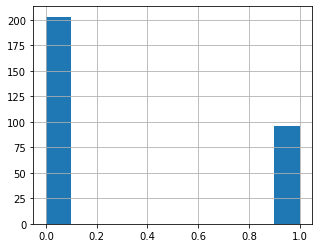

In [12]:
#Plot the ratio of data imbalance 
train_df['DEATH_EVENT'].hist(figsize=(5,4))

Observations:

1. The ratio of Dead patients to censored patients is 2: 1, hence we will not need to address imbalance effect.

**2.3.2 Examine plots to identify patterns or insight**

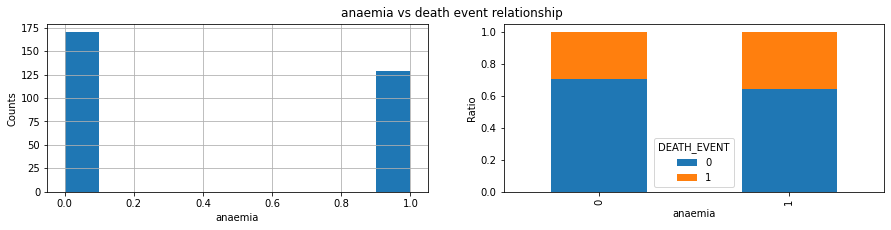

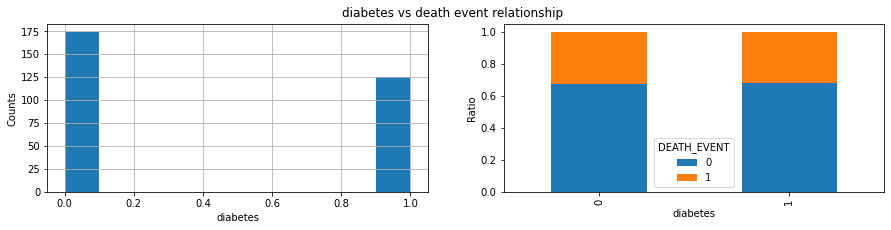

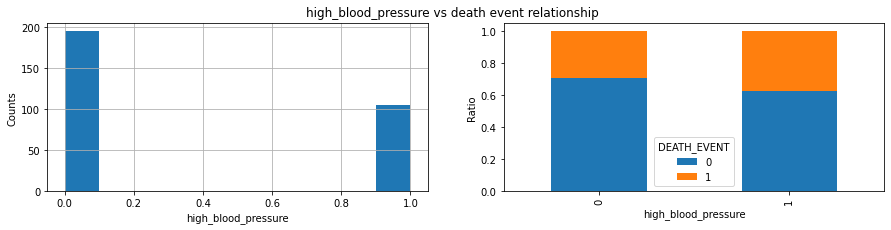

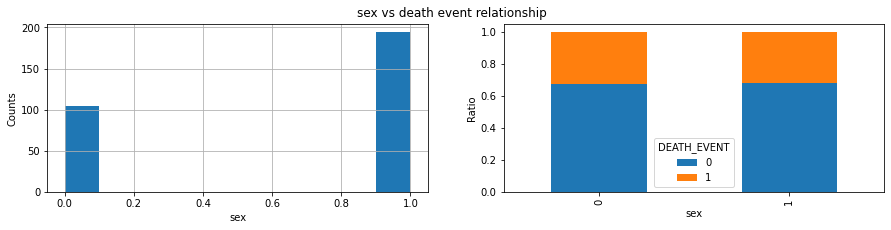

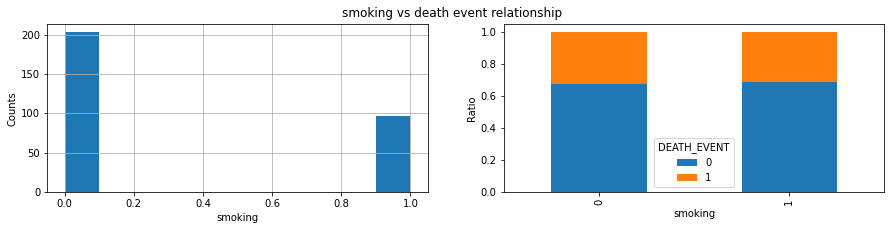

In [13]:
features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plot1_feat = eda_process(train_df)
plot1_feat.plot_composites(features) 

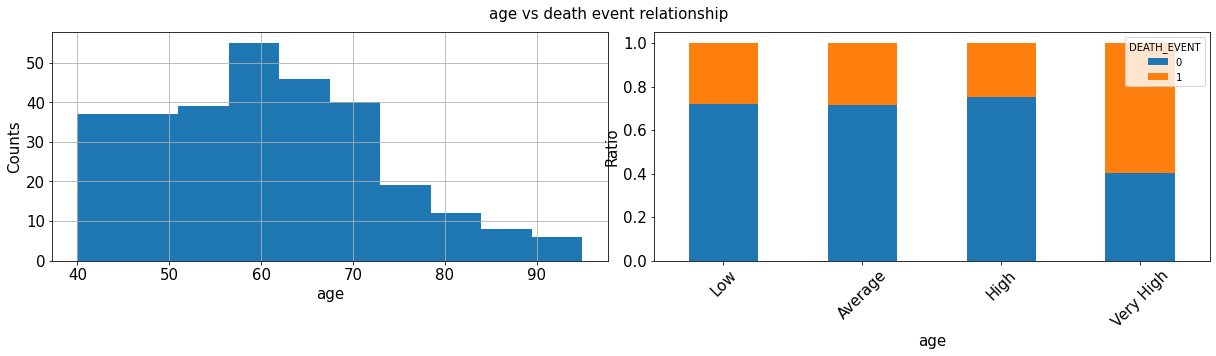

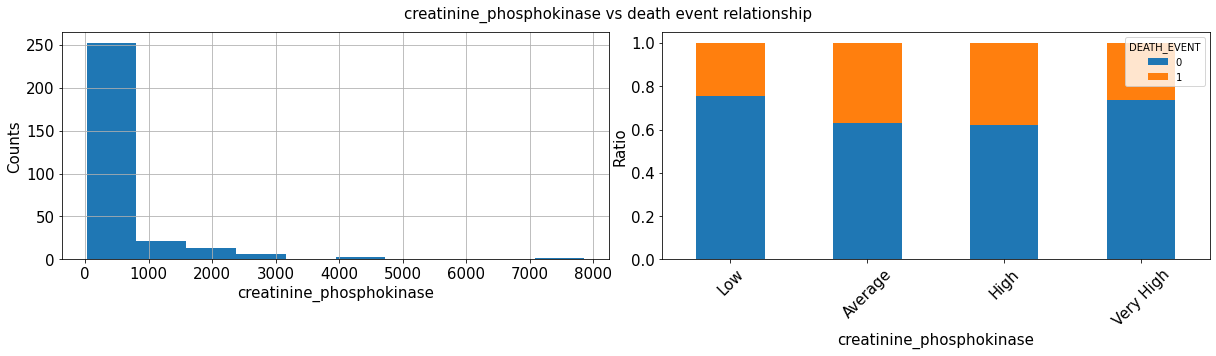

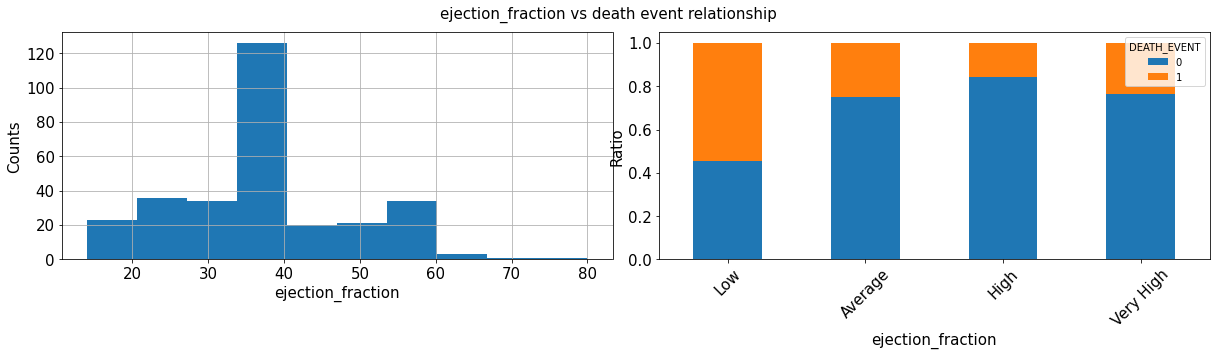

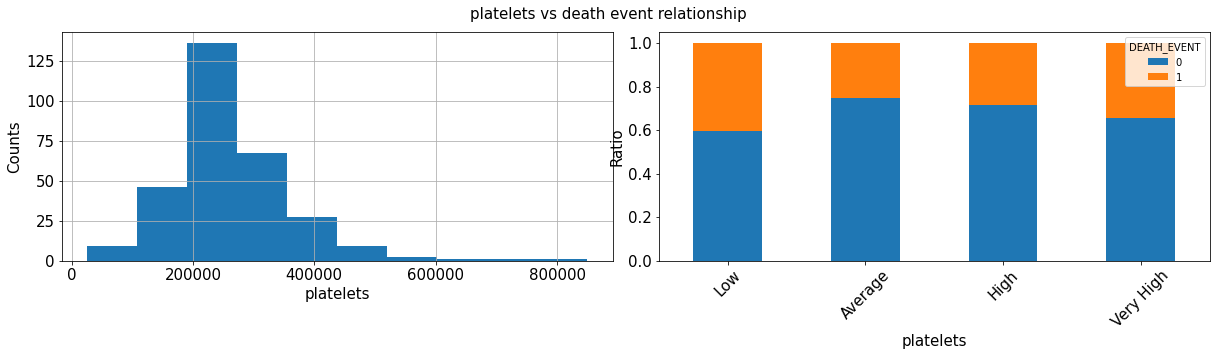

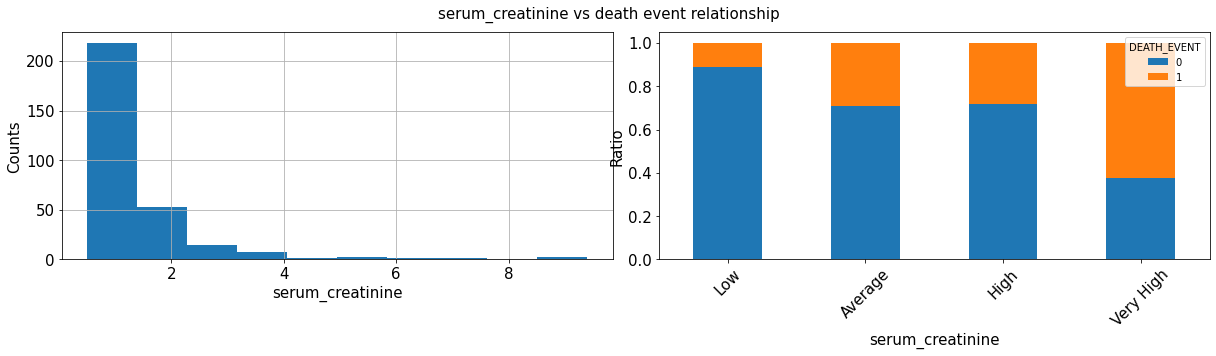

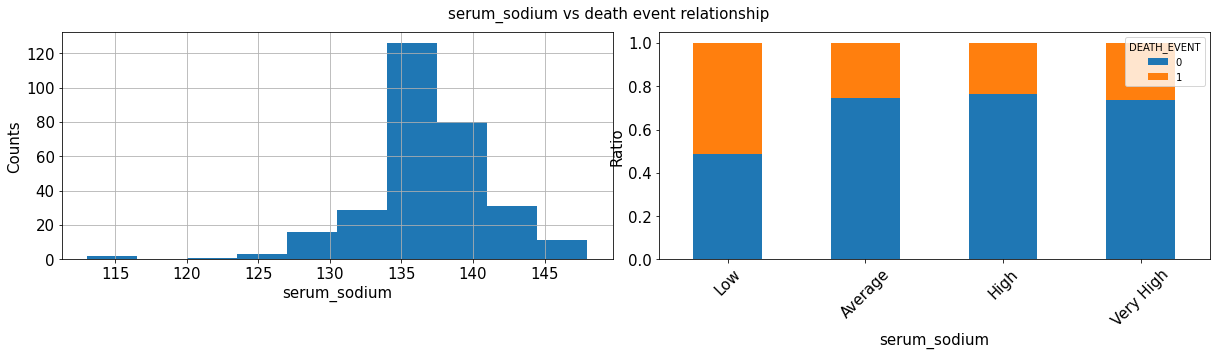

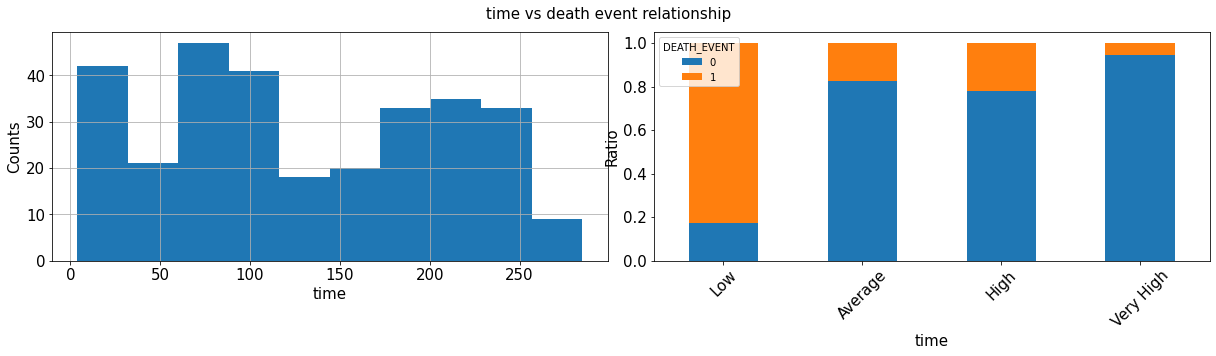

In [14]:
feature = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets', 'serum_creatinine', 'serum_sodium', 'time']

plot1_feat = eda_process(train_df)
plot1_feat.groupplot_compIQR(feature)

### Observations from EDA  <a name="2.3.1"></a>

- Hypothesis #1: Older patients should have higher DEATH_EVENTS
  - Confirmed. 30% increase in death event for patients between 70 -95 years old compared to younger patients. There are more patients between 40 - 70yrs old in the data.
- Hypothesis #2: Anaemic patients should have higher DEATH EVENTS
  - Confirmed. 7% increase in death event for patients with anaemia. There are more patients without anaemia in the data. 
- Hypothesis #3: Diabetic patients should have lower DEATH_EVENTS as it is a treatable ailment.
  - Confirmed. No significant difference in death event between diabetic and non-diabetic patients, there are more non-diabetic patients in the data.
- Hypothesis #4: High Blood Pressure patients should have higher DEATH EVENTS
  - Confirmed, 8% increase in death event for patients with high blood pressure. There are more patients without high blood pressure in the data.
- Hypothesis #5: Smokers should have higher DEATH EVENTS
  - Not Confirmed. No significant difference in death event between smokers and non-smokers, there are more non-smokers in the data.
- Other Observations:
  - No significant difference in death event between male and female patients, there are more male patients in the data.
  - Approx 10% increase in death event for patients with creatinine_phosphokinase between 116 - 582 mcg/L compared to patients with lower or higher values. There are more patients with low creatinine_phosphokinase in the data.
  - Approx 35% increase in death event for patients with Ejection_fraction lower than 30%. The ejection_fraction data is fairly normally distributed.
  - Approx 10% increase in death event for patients with platelets lower than 212,500 kiloplatelets/mL. The platelets data is fairly normally distributed.
  - Approx 30% increase in death event for patients with serum_creatinine higher than 1.4mg/dL. There are more patients with serum_creatinine lower than 0.9mg/dL in the data.
  - Approx 25% increase in death event for patients with serum_sodium lower than 134 mEq/L. The serum_sodium data is fairly normally distributed.
  - Approx 60% increase in death event for patients with time lower than 73.


**2.3.3 Checking numerical features for correlation**  <a name="2.3.3"></a>

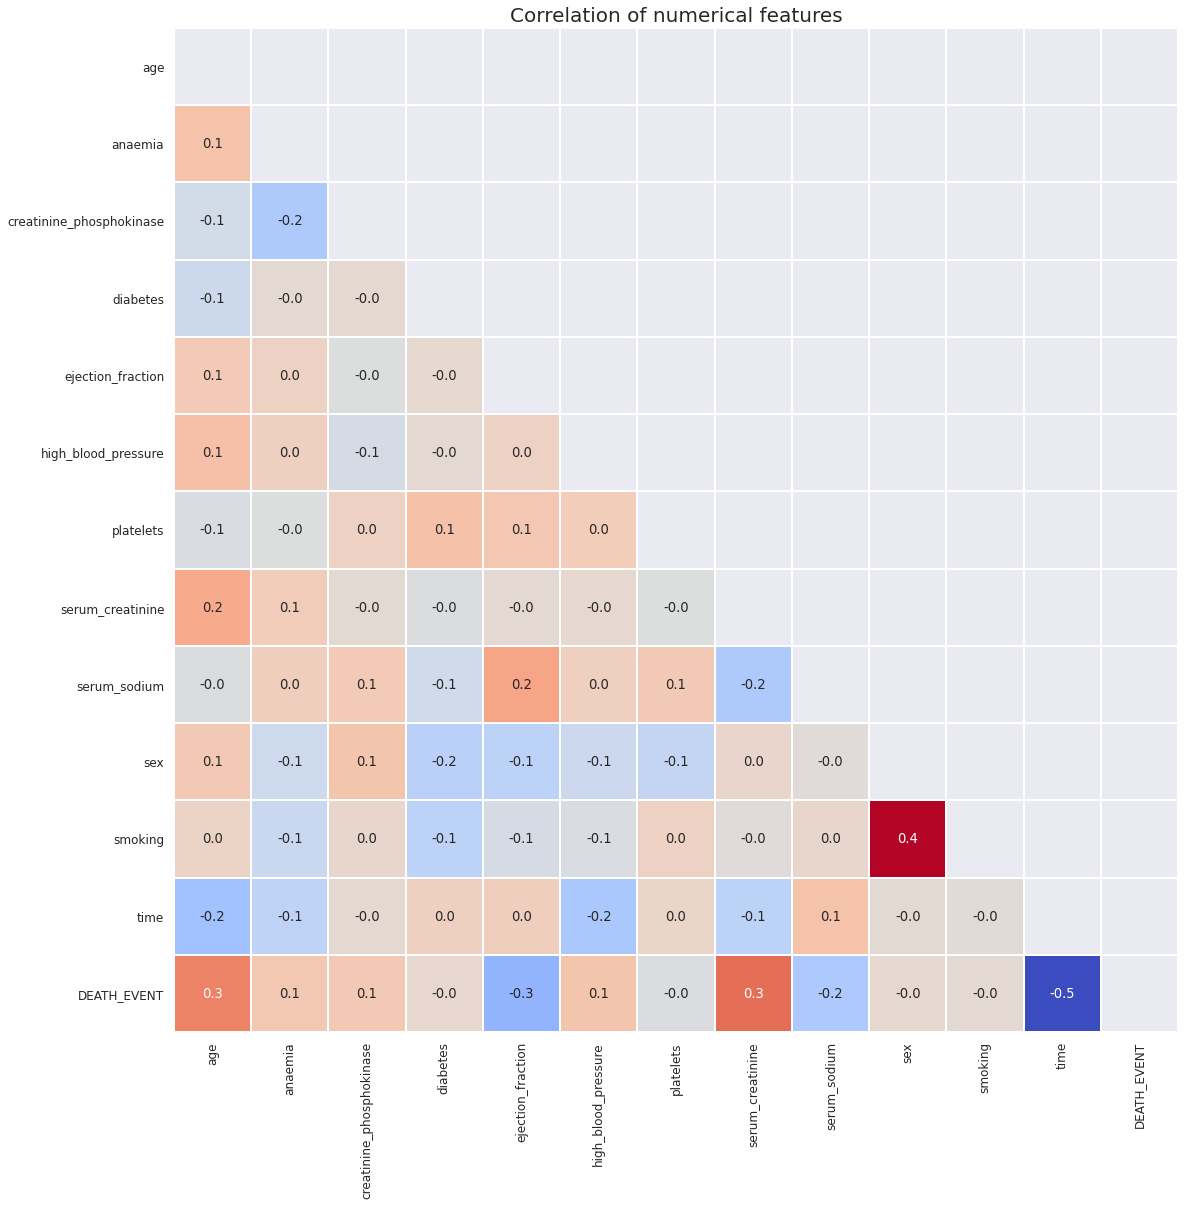

In [15]:
#Heatmap for numerical features correlation in Training Dataset
num_feature_corr = eda_process(train_df)
num_feature_corr.heatmap_num('numerical features')

Observations: 

1. The heat map shows age, ejection_fraction, serum_creatinine have the highest correlation to Death_event in that order.
2. The time feature will be considered to be dropped during feature engineering considering there is no clear definition of what it realy measures.
3. Following features to be excluded due to low correlation to death_event are:
   - diabetes, platelets, sex, smoking.

**2.3.4 Drop features identified in section 2.3.3 from data**

In [16]:
#Drop identified features above in data
features = ['diabetes','platelets', 'sex', 'smoking', 'A']
features_datadrop = eda_process(train_df)
features_datadrop.data_drop(train_df, features)
train_df.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,582,20,1,1.9,130,4,1
1,55.0,0,7861,38,0,1.1,136,6,1
2,65.0,0,146,20,0,1.3,129,7,1
3,50.0,1,111,20,0,1.9,137,7,1
4,65.0,1,160,20,0,2.7,116,8,1


**2.3.5 Inspecting for skewness in dataset**  <a name="2.3.5"></a>

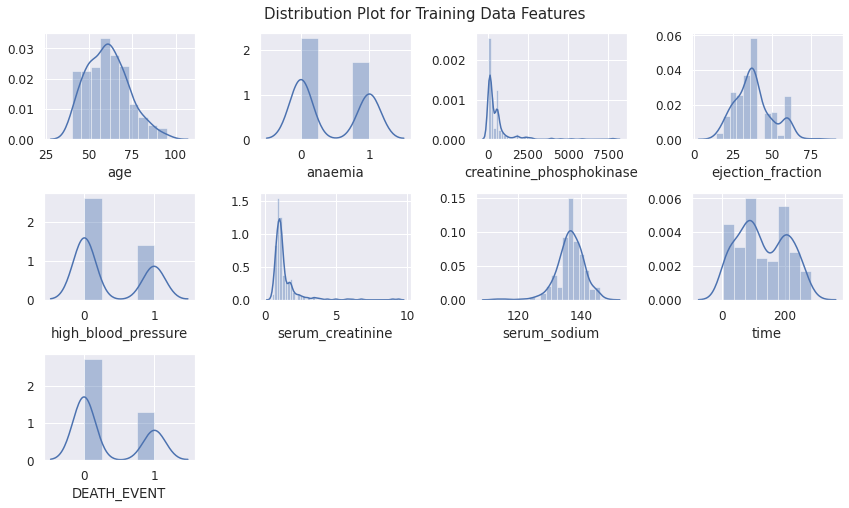

In [17]:
num_distribution_plot = eda_process(train_df)
num_distribution_plot.num_features_distplot('Training Data')

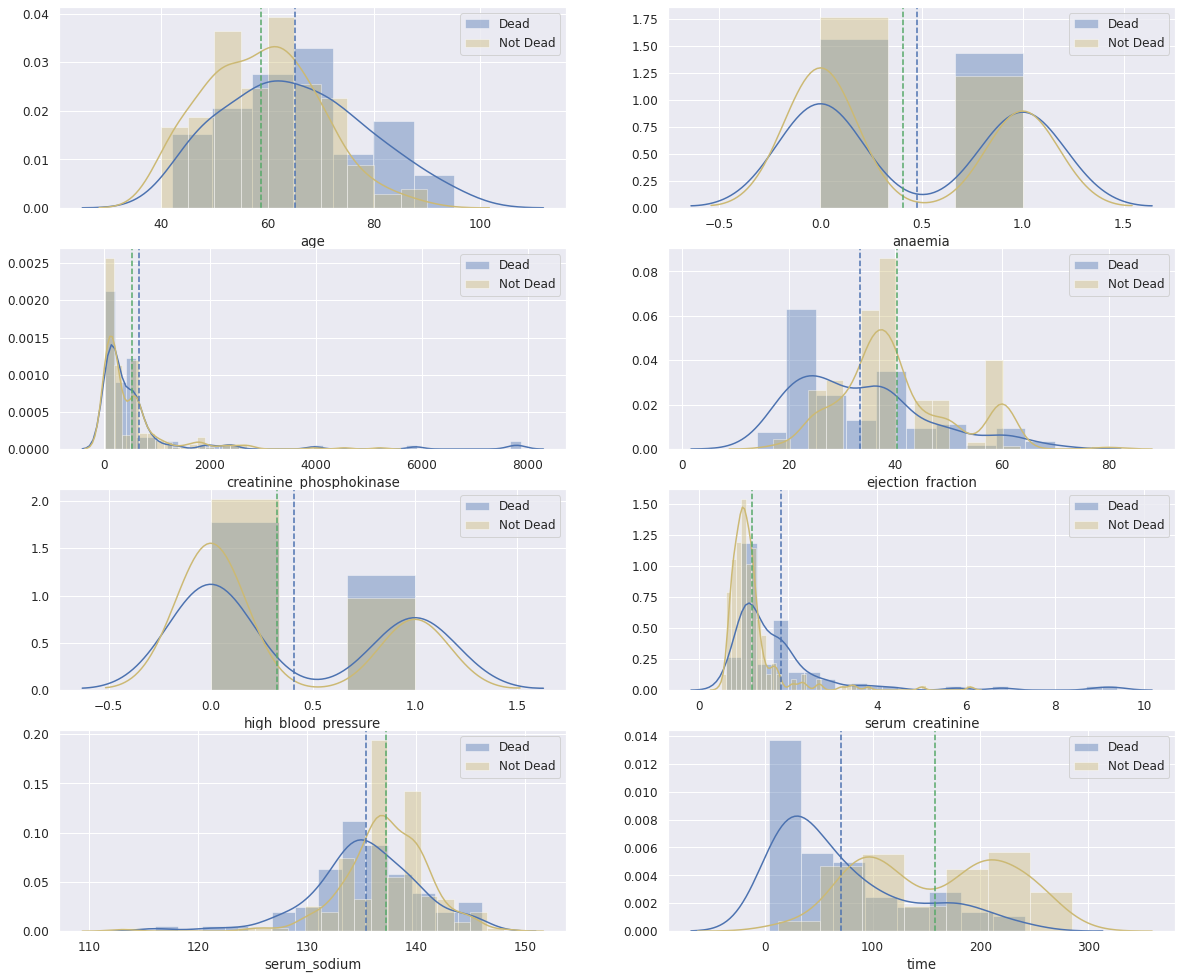

In [18]:
# Subsetting by clicks
death_yes = train_df["DEATH_EVENT"] == 1
death_no = train_df["DEATH_EVENT"] == 0

# Creating the plots
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 
            'serum_sodium', 'time']
labels = ["Dead", "Not Dead"]

def creating_plots(features, labels):
    plt.figure(figsize=(20,17))
    for feature in features:
        plt.subplot(4, 2, features.index(feature)+1)
        sns.distplot(train_df[feature][death_yes], label=labels[0], color="b")
        sns.distplot(train_df[feature][death_no], label=labels[1], color="y")
        plt.axvline(train_df[feature][death_yes].mean(), linestyle = '--', color="b")
        plt.axvline(train_df[feature][death_no].mean(), linestyle = '--', color="g")
        plt.legend()

creating_plots(features, labels)

In [19]:
skewness = train_df.skew().round(decimals=2)
skew_data = pd.DataFrame(skewness).reset_index()
skew_data.columns = ['feature', 'skew_value']
skew_data

,feature,skew_value
0,age,0.42
1,anaemia,0.28
2,creatinine_phosphokinase,4.46
3,ejection_fraction,0.56
4,high_blood_pressure,0.63
5,serum_creatinine,4.46
6,serum_sodium,-1.05
7,time,0.13
8,DEATH_EVENT,0.77


creatinine_phosphokinase has a skew of 4.46 while the log-transformed creatinine_phosphokinase improves the skew to 0.41


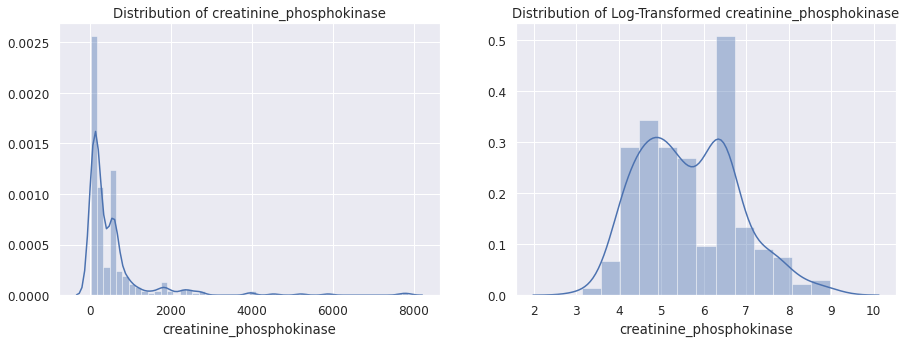

In [20]:
#Inspection for skewness
plot = eda_process(train_df.creatinine_phosphokinase)
plot.dist_plot('creatinine_phosphokinase')

serum_creatinine has a skew of 4.46 while the log-transformed serum_creatinine improves the skew to 1.58


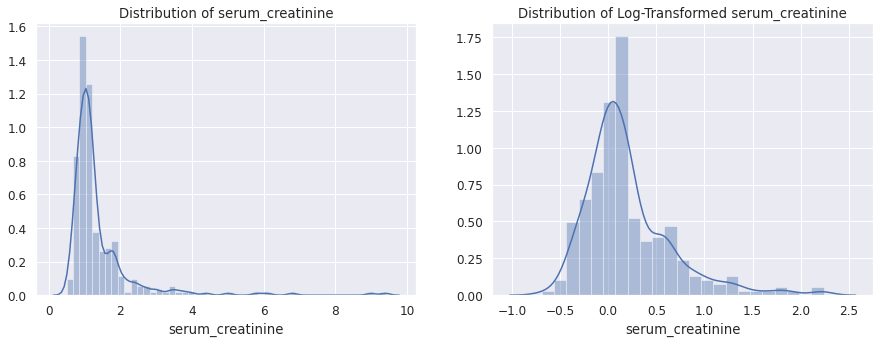

In [21]:
#Inspection for skewness
plot = eda_process(train_df.serum_creatinine)
plot.dist_plot('serum_creatinine')

serum_sodium has a skew of -1.05 while the log-transformed serum_sodium improves the skew to -1.31


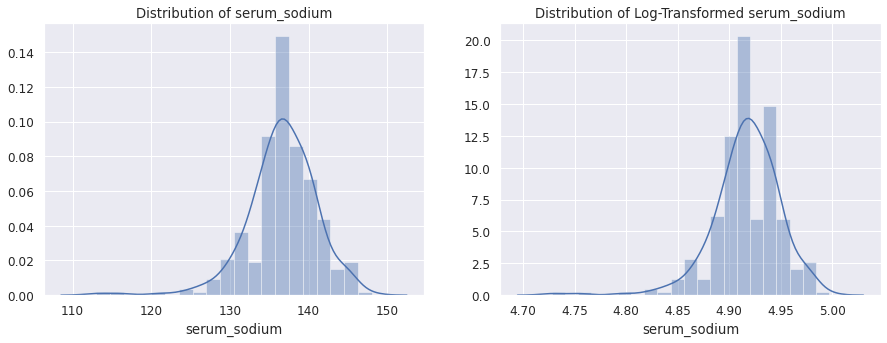

In [22]:
#Inspection for skewness
plot = eda_process(train_df.serum_sodium)
plot.dist_plot('serum_sodium')

Observations: 

1. We could explore using log transformation of creatinine_phosphokinase and serum_creatinine for model improvement during model development.

In [23]:
#Exporting the cleaned training dataset to a csv file to use in Model Development Notebook
train_df.to_csv('train_df_forModel.csv', index=False)

### Now that we have completed EDA, we will now proceed to building models in the "Heart Failure Prediction Model Development Notebook". See Link Below.

https://github.com/laniyadapo/heartfailureprediction/blob/main/Heart%20Failure%20Prediction%20Model%20Development%20Notebook.ipynb